# Data analysis of meteo.lt API data in Vilnius

This notebook demonstrates the usage of the MeteoClient class which interacts with the Meteo.lt API and does some basic data analysis.

## Libraries

In [53]:
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pytz import timezone

from meteo_api.meteo_client import MeteoClient


## Initialize the client

In [8]:
client = MeteoClient()

## Constants of interest

Note this analysis is focused on Vilnius, Lithuania. Meteo.lt is a Lithuanian weather service provider thus "Europe/Vilnius" is used as timezone. In client this is the default but incase of need this can be changed. For day and night analysis I use day start at 8 and end at 20 hours as default.

In [14]:
CITY_CODE = "vilnius"
STATION_CODE = "vilniaus-ams"
TIMEZONE = timezone("Europe/Vilnius")
DAY_START = 8
DAY_END = 20

## API exploration

below is api exploration of the meteo.lt api. Skip this part by toggling the cell. Note you can find more information about the api [here](https://api.meteo.lt)

### Places API

In [9]:
# https://api.meteo.lt/v1/places
places = client.get_places()
print(f"Total number of places: {len(places)}")
places.head()

Total number of places: 2495


,code,name,administrativeDivision,countryCode,coordinates
0,abromiskes,Abromiškės,Elektrėnų savivaldybė,LT,"{'latitude': 54.7825, 'longitude': 24.71032}"
1,acokavai,Acokavai,Radviliškio rajono savivaldybė,LT,"{'latitude': 55.72656, 'longitude': 23.34748}"
2,adakavas,Adakavas,Tauragės rajono savivaldybė,LT,"{'latitude': 55.40348, 'longitude': 22.66207}"
3,adomyne,Adomynė,Kupiškio rajono savivaldybė,LT,"{'latitude': 55.74974, 'longitude': 25.30647}"
4,adutiskis,Adutiškis,Švenčionių rajono savivaldybė,LT,"{'latitude': 55.15734, 'longitude': 26.58675}"


In [10]:
# https://api.meteo.lt/v1/places/vilnius
vilnius_info = client.get_place_info(CITY_CODE)
vilnius_info

,code,name,administrativeDivision,country,countryCode,coordinates
0,vilnius,Vilnius,Vilniaus miesto savivaldybė,Lietuva,LT,"{'latitude': 54.68705, 'longitude': 25.28291}"


In [12]:
# https://api.meteo.lt/v1/places/vilnius/forecasts
vilnius_forecasts = client.get_place_forecasts(CITY_CODE)
vilnius_forecasts

2025-05-25 20:08:09,509 [WARNING] - <meteo_api> - No column ending with 'TimeUtc' found in DataFrame.


,type,description,place_code,place_name,place_administrativeDivision,place_country,place_countryCode,place_coordinates
0,long-term,Long term numerical weather prediction,vilnius,Vilnius,Vilniaus miesto savivaldybė,Lietuva,LT,"{'latitude': 54.68705, 'longitude': 25.28291}"


In [13]:
# https://api.meteo.lt/v1/places/vilnius/forecasts/long-term
vilnius_forecast = client.get_place_forecast_by_type(CITY_CODE, "long-term")
vilnius_forecast.head()

,airTemperature,feelsLikeTemperature,windSpeed,windGust,windDirection,cloudCover,seaLevelPressure,relativeHumidity,totalPrecipitation,conditionCode,place_code,place_name,place_administrativeDivision,place_country,place_countryCode,place_coordinates,forecastType,forecastCreationTimeUtc
timestamp,,,,,,,,,,,,,,,,,,
2025-05-25 16:00:00+00:00,16.4,16.4,4,8,99,84,1015,40,0.0,cloudy,vilnius,Vilnius,Vilniaus miesto savivaldybė,Lietuva,LT,"{'latitude': 54.68705, 'longitude': 25.28291}",long-term,2025-05-25 14:01:32+00:00
2025-05-25 17:00:00+00:00,15.2,15.2,3,8,89,96,1015,53,0.0,cloudy,vilnius,Vilnius,Vilniaus miesto savivaldybė,Lietuva,LT,"{'latitude': 54.68705, 'longitude': 25.28291}",long-term,2025-05-25 14:01:32+00:00
2025-05-25 18:00:00+00:00,13.9,13.9,2,6,79,75,1015,66,0.0,cloudy-with-sunny-intervals,vilnius,Vilnius,Vilniaus miesto savivaldybė,Lietuva,LT,"{'latitude': 54.68705, 'longitude': 25.28291}",long-term,2025-05-25 14:01:32+00:00
2025-05-25 19:00:00+00:00,12.1,12.1,2,4,71,48,1015,76,0.0,partly-cloudy,vilnius,Vilnius,Vilniaus miesto savivaldybė,Lietuva,LT,"{'latitude': 54.68705, 'longitude': 25.28291}",long-term,2025-05-25 14:01:32+00:00
2025-05-25 20:00:00+00:00,10.7,10.7,2,4,66,45,1014,85,0.0,partly-cloudy,vilnius,Vilnius,Vilniaus miesto savivaldybė,Lietuva,LT,"{'latitude': 54.68705, 'longitude': 25.28291}",long-term,2025-05-25 14:01:32+00:00


In [15]:
vilnius_forecast = client.get_place_forecast_by_type(CITY_CODE, "long-term", TIMEZONE)
vilnius_forecast.head()


,airTemperature,feelsLikeTemperature,windSpeed,windGust,windDirection,cloudCover,seaLevelPressure,relativeHumidity,totalPrecipitation,conditionCode,place_code,place_name,place_administrativeDivision,place_country,place_countryCode,place_coordinates,forecastType,forecastCreationTimeUtc
timestamp,,,,,,,,,,,,,,,,,,
2025-05-25 19:00:00+03:00,16.4,16.4,4,8,99,84,1015,40,0.0,cloudy,vilnius,Vilnius,Vilniaus miesto savivaldybė,Lietuva,LT,"{'latitude': 54.68705, 'longitude': 25.28291}",long-term,2025-05-25 17:01:32+03:00
2025-05-25 20:00:00+03:00,15.2,15.2,3,8,89,96,1015,53,0.0,cloudy,vilnius,Vilnius,Vilniaus miesto savivaldybė,Lietuva,LT,"{'latitude': 54.68705, 'longitude': 25.28291}",long-term,2025-05-25 17:01:32+03:00
2025-05-25 21:00:00+03:00,13.9,13.9,2,6,79,75,1015,66,0.0,cloudy-with-sunny-intervals,vilnius,Vilnius,Vilniaus miesto savivaldybė,Lietuva,LT,"{'latitude': 54.68705, 'longitude': 25.28291}",long-term,2025-05-25 17:01:32+03:00
2025-05-25 22:00:00+03:00,12.1,12.1,2,4,71,48,1015,76,0.0,partly-cloudy,vilnius,Vilnius,Vilniaus miesto savivaldybė,Lietuva,LT,"{'latitude': 54.68705, 'longitude': 25.28291}",long-term,2025-05-25 17:01:32+03:00
2025-05-25 23:00:00+03:00,10.7,10.7,2,4,66,45,1014,85,0.0,partly-cloudy,vilnius,Vilnius,Vilniaus miesto savivaldybė,Lietuva,LT,"{'latitude': 54.68705, 'longitude': 25.28291}",long-term,2025-05-25 17:01:32+03:00


### Stations API

In [16]:
# https://api.meteo.lt/v1/stations
stations = client.get_stations()
print(f"Total number of stations: {len(stations)}")
stations.head()

Total number of stations: 52


,code,name,coordinates
0,akmenes-ams,Akmenės AMS,"{'latitude': 56.24992, 'longitude': 22.73081}"
1,alytaus-ams,Alytaus AMS,"{'latitude': 54.412435, 'longitude': 24.063274}"
2,anyksciu-ams,Anykščių AMS,"{'latitude': 55.51735, 'longitude': 25.1178}"
3,birstono-ams,Birštono AMS,"{'latitude': 54.603217, 'longitude': 24.035802}"
4,birzu-ams,Biržų AMS,"{'latitude': 56.193191, 'longitude': 24.774184}"


In [17]:
# https://api.meteo.lt/v1/stations/vilniaus-ams
vilnius_station = client.get_station_info(STATION_CODE)
vilnius_station

,code,name,type,coordinates
0,vilniaus-ams,Vilniaus AMS,Automatinė meteorologijos stotis,"{'latitude': 54.625992, 'longitude': 25.107064}"


In [18]:
# https://api.meteo.lt/v1/stations/vilniaus-ams/observations
vilnius_observations = client.get_more_station_info(STATION_CODE)
vilnius_observations.head()

,station,observationsDataRange
0,"{'code': 'vilniaus-ams', 'name': 'Vilniaus AMS...","{'startTimeUtc': '2015-05-25 00:00:00', 'endTi..."


In [19]:
# https://api.meteo.lt/v1/stations/vilniaus-ams/observations/latest
vilnius_historical_data = client.get_station_historical_observations(
    STATION_CODE, "2025-05-22"
)
vilnius_historical_data.head()

,airTemperature,feelsLikeTemperature,windSpeed,windGust,windDirection,cloudCover,seaLevelPressure,relativeHumidity,precipitation,conditionCode,station_code,station_name,station_coordinates
timestamp,,,,,,,,,,,,,
2025-05-22 00:00:00+00:00,12.9,12.9,1.3,3.8,162,100,1006.2,76,0.4,rain,vilniaus-ams,Vilniaus AMS,"{'latitude': 54.625992, 'longitude': 25.107064}"
2025-05-22 01:00:00+00:00,12.7,12.7,1.3,3.2,176,100,1006.0,74,0.0,cloudy,vilniaus-ams,Vilniaus AMS,"{'latitude': 54.625992, 'longitude': 25.107064}"
2025-05-22 02:00:00+00:00,12.5,12.5,2.1,3.2,156,100,1005.8,74,0.0,cloudy,vilniaus-ams,Vilniaus AMS,"{'latitude': 54.625992, 'longitude': 25.107064}"
2025-05-22 03:00:00+00:00,12.1,12.1,1.9,3.9,158,50,1005.9,77,0.0,variable-cloudiness,vilniaus-ams,Vilniaus AMS,"{'latitude': 54.625992, 'longitude': 25.107064}"
2025-05-22 04:00:00+00:00,13.5,13.5,2.5,4.5,184,0,1006.0,72,0.0,clear,vilniaus-ams,Vilniaus AMS,"{'latitude': 54.625992, 'longitude': 25.107064}"


In [20]:
# https://api.meteo.lt/v1/stations/vilniaus-ams/observations/latest
vilnius_historical_data = client.get_station_historical_observations(
    STATION_CODE, "2025-05-22", time_zone=TIMEZONE
)
vilnius_historical_data.head()


,airTemperature,feelsLikeTemperature,windSpeed,windGust,windDirection,cloudCover,seaLevelPressure,relativeHumidity,precipitation,conditionCode,station_code,station_name,station_coordinates
timestamp,,,,,,,,,,,,,
2025-05-22 03:00:00+03:00,12.9,12.9,1.3,3.8,162,100,1006.2,76,0.4,rain,vilniaus-ams,Vilniaus AMS,"{'latitude': 54.625992, 'longitude': 25.107064}"
2025-05-22 04:00:00+03:00,12.7,12.7,1.3,3.2,176,100,1006.0,74,0.0,cloudy,vilniaus-ams,Vilniaus AMS,"{'latitude': 54.625992, 'longitude': 25.107064}"
2025-05-22 05:00:00+03:00,12.5,12.5,2.1,3.2,156,100,1005.8,74,0.0,cloudy,vilniaus-ams,Vilniaus AMS,"{'latitude': 54.625992, 'longitude': 25.107064}"
2025-05-22 06:00:00+03:00,12.1,12.1,1.9,3.9,158,50,1005.9,77,0.0,variable-cloudiness,vilniaus-ams,Vilniaus AMS,"{'latitude': 54.625992, 'longitude': 25.107064}"
2025-05-22 07:00:00+03:00,13.5,13.5,2.5,4.5,184,0,1006.0,72,0.0,clear,vilniaus-ams,Vilniaus AMS,"{'latitude': 54.625992, 'longitude': 25.107064}"


In [21]:
# https://api.meteo.lt/v1/stations/vilniaus-ams/observations/
vilnius_historical_data = client.get_station_historical_observations_range(
    STATION_CODE,
    datetime.now(TIMEZONE) - timedelta(days=3),
    datetime.now(TIMEZONE),
    TIMEZONE
)
vilnius_historical_data.head()


2025-05-25 20:13:36,138 [INFO] - <meteo_api> - Fetching data for 2025-05-22...


2025-05-25 20:13:36,503 [INFO] - <meteo_api> - Fetching data for 2025-05-23...
2025-05-25 20:13:36,851 [INFO] - <meteo_api> - Fetching data for 2025-05-24...
2025-05-25 20:13:37,209 [INFO] - <meteo_api> - Fetching data for 2025-05-25...


,airTemperature,feelsLikeTemperature,windSpeed,windGust,windDirection,cloudCover,seaLevelPressure,relativeHumidity,precipitation,conditionCode,station_code,station_name,station_coordinates
timestamp,,,,,,,,,,,,,
2025-05-22 03:00:00+03:00,12.9,12.9,1.3,3.8,162,100,1006.2,76,0.4,rain,vilniaus-ams,Vilniaus AMS,"{'latitude': 54.625992, 'longitude': 25.107064}"
2025-05-22 04:00:00+03:00,12.7,12.7,1.3,3.2,176,100,1006.0,74,0.0,cloudy,vilniaus-ams,Vilniaus AMS,"{'latitude': 54.625992, 'longitude': 25.107064}"
2025-05-22 05:00:00+03:00,12.5,12.5,2.1,3.2,156,100,1005.8,74,0.0,cloudy,vilniaus-ams,Vilniaus AMS,"{'latitude': 54.625992, 'longitude': 25.107064}"
2025-05-22 06:00:00+03:00,12.1,12.1,1.9,3.9,158,50,1005.9,77,0.0,variable-cloudiness,vilniaus-ams,Vilniaus AMS,"{'latitude': 54.625992, 'longitude': 25.107064}"
2025-05-22 07:00:00+03:00,13.5,13.5,2.5,4.5,184,0,1006.0,72,0.0,clear,vilniaus-ams,Vilniaus AMS,"{'latitude': 54.625992, 'longitude': 25.107064}"


# Data Analysis

1. Data overview
    - Get data for last year
    - Calculate average annual temperature and air humidity
    - Calculate average annual day and night temperature
    - Calculate number of rainy weekends
2. Last week and next week forecast
3. Interpolate temperature to 5 minute intervals

## Data overview

### Get data for last year

In [22]:
# https://api.meteo.lt/v1/stations/vilniaus-ams/observations/
last_year_data = client.get_station_historical_observations_range(
    STATION_CODE,
    datetime.now(TIMEZONE) - timedelta(days=365),
    datetime.now(TIMEZONE),
    TIMEZONE,
)
last_year_data.head()


2025-05-25 20:15:17,816 [INFO] - <meteo_api> - Fetching data for 2024-05-25...
2025-05-25 20:15:18,272 [INFO] - <meteo_api> - Fetching data for 2024-05-26...
2025-05-25 20:15:18,688 [INFO] - <meteo_api> - Fetching data for 2024-05-27...
2025-05-25 20:15:16,162 [INFO] - <meteo_api> - Fetching data for 2024-05-28...
2025-05-25 20:15:16,504 [INFO] - <meteo_api> - Fetching data for 2024-05-29...
2025-05-25 20:15:16,846 [INFO] - <meteo_api> - Fetching data for 2024-05-30...
2025-05-25 20:15:17,193 [INFO] - <meteo_api> - Fetching data for 2024-05-31...
2025-05-25 20:15:17,550 [INFO] - <meteo_api> - Fetching data for 2024-06-01...
2025-05-25 20:15:17,896 [INFO] - <meteo_api> - Fetching data for 2024-06-02...
2025-05-25 20:15:18,241 [INFO] - <meteo_api> - Fetching data for 2024-06-03...
2025-05-25 20:15:18,584 [INFO] - <meteo_api> - Fetching data for 2024-06-04...
2025-05-25 20:15:18,924 [INFO] - <meteo_api> - Fetching data for 2024-06-05...
2025-05-25 20:15:19,633 [INFO] - <meteo_api> - Fetch

,airTemperature,feelsLikeTemperature,windSpeed,windGust,windDirection,cloudCover,seaLevelPressure,relativeHumidity,precipitation,conditionCode,station_code,station_name,station_coordinates
timestamp,,,,,,,,,,,,,
2024-05-25 03:00:00+03:00,15.9,15.9,1.3,3.0,100,50.0,1024.3,72,0.0,variable-cloudiness,vilniaus-ams,Vilniaus AMS,"{'latitude': 54.625992, 'longitude': 25.107064}"
2024-05-25 04:00:00+03:00,15.8,15.8,1.3,3.9,88,88.0,1024.1,74,0.0,cloudy,vilniaus-ams,Vilniaus AMS,"{'latitude': 54.625992, 'longitude': 25.107064}"
2024-05-25 05:00:00+03:00,15.1,15.1,1.7,3.4,132,75.0,1024.3,79,0.0,cloudy-with-sunny-intervals,vilniaus-ams,Vilniaus AMS,"{'latitude': 54.625992, 'longitude': 25.107064}"
2024-05-25 06:00:00+03:00,15.2,15.2,2.7,4.3,135,13.0,1024.6,80,0.0,partly-cloudy,vilniaus-ams,Vilniaus AMS,"{'latitude': 54.625992, 'longitude': 25.107064}"
2024-05-25 07:00:00+03:00,16.9,16.9,1.6,4.5,115,88.0,1024.5,74,0.0,cloudy,vilniaus-ams,Vilniaus AMS,"{'latitude': 54.625992, 'longitude': 25.107064}"


In [23]:
is_datetimeindex = isinstance(last_year_data.index, pd.DatetimeIndex)
print(is_datetimeindex)


True


Note there is 366 days in the dataset. This is because of timezones.

In [24]:
total_days = len(pd.Series(last_year_data.index.date).unique())
print(f"Total number of days in the dataset: {total_days}")


Total number of days in the dataset: 366


### Mean annual temperature and air humidity

In [25]:
average_annual_temperature = last_year_data["airTemperature"].mean()
average_annual_humidity = last_year_data["relativeHumidity"].mean()
print(f"Average Annual Temperature: {average_annual_temperature:.2f} °C")
print(f"Average Annual Air Humidity: {average_annual_humidity:.2f} %")

Average Annual Temperature: 9.27 °C
Average Annual Air Humidity: 77.43 %


### Average Annual Day and Night Temperature

In [ ]:
daytime_data = last_year_data[
    (last_year_data.index.hour >= DAY_START)
    & (last_year_data.index.hour < DAY_END)
]
nighttime_data = last_year_data[
    (last_year_data.index.hour < DAY_START)
    | (last_year_data.index.hour >= DAY_END)
]

average_day_temperature = daytime_data["airTemperature"].mean()
average_night_temperature = nighttime_data["airTemperature"].mean()

print(f"Average Annual Day Temp (08:00-20:00): {average_day_temperature:.2f} °C")
print(
    f"Average Annual Night Temp (20:00-08:00): {average_night_temperature:.2f} °C"
)


Average Annual Day Temperature (08:00-20:00): 10.81 °C
Average Annual Night Temperature (20:00-08:00): 7.72 °C


### Number of rainy weekends

Below my code finds that there was at least little percipation in 34 weekends. Note that This can be improved to include treshold of how much percipation do we say it is rainy as right now if it is even 0.1 at any given hour on saturday or sunday this gets flagged as rainy weekend.

In [28]:
def get_rainy_weekends(df: pd.DataFrame) -> pd.Index:
    """Return the list of Saturdays (weekends) where it rained on Saturday or Sunday."""
    return (
        df[df.index.weekday >= 5]  # noqa: PLR2004
        .assign(
            weekend_id=lambda d: d.index.to_series().apply(
                lambda dt: (dt - pd.to_timedelta(dt.weekday() - 5, unit="days")).date()
            )
        )
        .groupby("weekend_id")["precipitation"]
        .any()
        .pipe(lambda s: s[s].index)
    )

In [30]:
print("Number of rainy weekends:", len(get_rainy_weekends(last_year_data)))

Number of rainy weekends: 34


## Last week and next week forecast

Here I am using the last week and next week forecast to compare the temperature.

In [31]:
last_week_data = client.get_station_historical_observations_range(
    STATION_CODE,
    datetime.now(TIMEZONE) - timedelta(days=7),
    datetime.now(TIMEZONE),
    TIMEZONE,
)
last_week_data.head()


2025-05-25 20:19:01,923 [INFO] - <meteo_api> - Fetching data for 2025-05-18...
2025-05-25 20:19:02,303 [INFO] - <meteo_api> - Fetching data for 2025-05-19...
2025-05-25 20:19:02,619 [INFO] - <meteo_api> - Fetching data for 2025-05-20...
2025-05-25 20:19:02,927 [INFO] - <meteo_api> - Fetching data for 2025-05-21...
2025-05-25 20:19:03,234 [INFO] - <meteo_api> - Fetching data for 2025-05-22...
2025-05-25 20:19:03,612 [INFO] - <meteo_api> - Fetching data for 2025-05-23...
2025-05-25 20:19:03,958 [INFO] - <meteo_api> - Fetching data for 2025-05-24...
2025-05-25 20:19:04,370 [INFO] - <meteo_api> - Fetching data for 2025-05-25...


,airTemperature,feelsLikeTemperature,windSpeed,windGust,windDirection,cloudCover,seaLevelPressure,relativeHumidity,precipitation,conditionCode,station_code,station_name,station_coordinates
timestamp,,,,,,,,,,,,,
2025-05-18 03:00:00+03:00,7.5,7.5,1.1,1.5,185,100.0,1005.8,100,0.1,light-rain,vilniaus-ams,Vilniaus AMS,"{'latitude': 54.625992, 'longitude': 25.107064}"
2025-05-18 04:00:00+03:00,7.4,7.4,1.3,2.1,200,100.0,1005.5,100,0.2,light-rain,vilniaus-ams,Vilniaus AMS,"{'latitude': 54.625992, 'longitude': 25.107064}"
2025-05-18 05:00:00+03:00,7.2,7.2,1.0,2.4,180,100.0,1005.1,100,0.3,light-rain,vilniaus-ams,Vilniaus AMS,"{'latitude': 54.625992, 'longitude': 25.107064}"
2025-05-18 06:00:00+03:00,7.2,7.2,1.1,1.7,180,100.0,1005.0,100,0.0,light-rain,vilniaus-ams,Vilniaus AMS,"{'latitude': 54.625992, 'longitude': 25.107064}"
2025-05-18 07:00:00+03:00,7.5,7.5,1.0,2.1,188,100.0,1005.2,100,0.0,rain,vilniaus-ams,Vilniaus AMS,"{'latitude': 54.625992, 'longitude': 25.107064}"


In [33]:
next_week_forecast = client.get_place_forecast_by_type(CITY_CODE, "long-term", TIMEZONE)
next_week_forecast.head()

,airTemperature,feelsLikeTemperature,windSpeed,windGust,windDirection,cloudCover,seaLevelPressure,relativeHumidity,totalPrecipitation,conditionCode,place_code,place_name,place_administrativeDivision,place_country,place_countryCode,place_coordinates,forecastType,forecastCreationTimeUtc
timestamp,,,,,,,,,,,,,,,,,,
2025-05-25 20:00:00+03:00,15.5,15.5,3,7,87,78,1015,48,0.0,cloudy,vilnius,Vilnius,Vilniaus miesto savivaldybė,Lietuva,LT,"{'latitude': 54.68705, 'longitude': 25.28291}",long-term,2025-05-25 20:09:33+03:00
2025-05-25 21:00:00+03:00,14.1,14.1,2,6,74,98,1015,58,0.0,cloudy,vilnius,Vilnius,Vilniaus miesto savivaldybė,Lietuva,LT,"{'latitude': 54.68705, 'longitude': 25.28291}",long-term,2025-05-25 20:09:33+03:00
2025-05-25 22:00:00+03:00,12.5,12.5,2,4,51,81,1015,64,0.0,cloudy,vilnius,Vilnius,Vilniaus miesto savivaldybė,Lietuva,LT,"{'latitude': 54.68705, 'longitude': 25.28291}",long-term,2025-05-25 20:09:33+03:00
2025-05-25 23:00:00+03:00,11.1,11.1,2,3,68,66,1014,73,0.0,cloudy-with-sunny-intervals,vilnius,Vilnius,Vilniaus miesto savivaldybė,Lietuva,LT,"{'latitude': 54.68705, 'longitude': 25.28291}",long-term,2025-05-25 20:09:33+03:00
2025-05-26 00:00:00+03:00,10.0,9.2,2,4,83,87,1014,88,0.0,cloudy,vilnius,Vilnius,Vilniaus miesto savivaldybė,Lietuva,LT,"{'latitude': 54.68705, 'longitude': 25.28291}",long-term,2025-05-25 20:09:33+03:00


again due to timezones there is one more day than expected

In [34]:
print(f"Days in forecast: {len(pd.Series(next_week_forecast.index.date).unique())}")

Days in forecast: 8


In [36]:
previous_week_temp = last_week_data["airTemperature"].rename("Previous Week Temp")
predicted_temp = next_week_forecast["airTemperature"].rename("Predicted Temp")

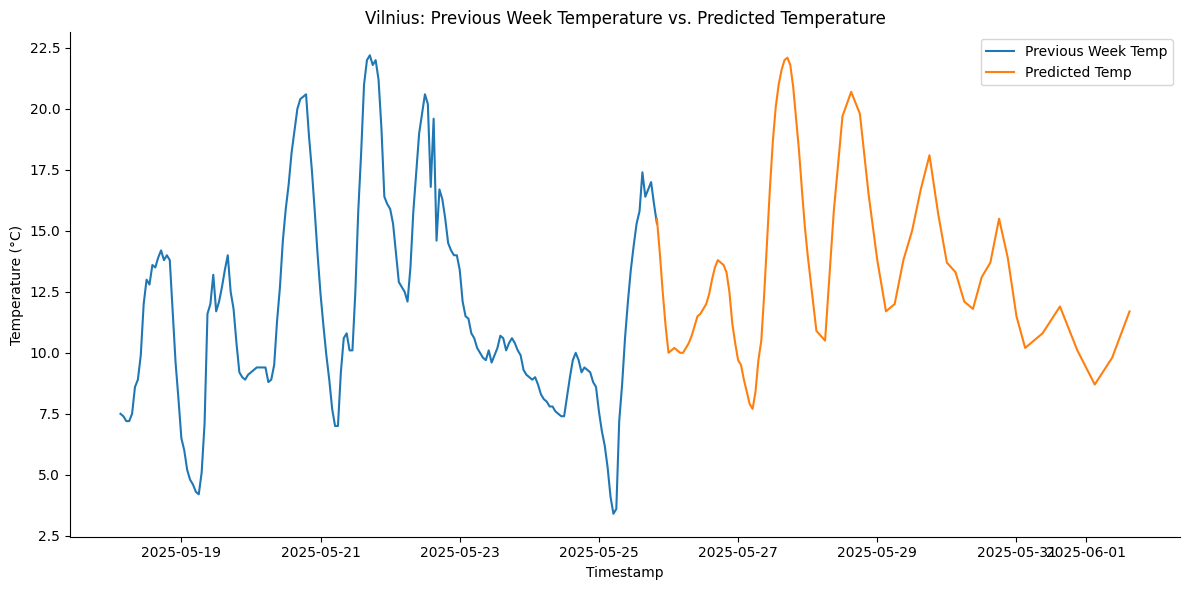

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(
    previous_week_temp.index,
    previous_week_temp.values,
    label="Previous Week Temp",
)
plt.plot(predicted_temp.index, predicted_temp.values, label="Predicted Temp")

plt.xlabel("Timestamp")
plt.ylabel("Temperature (°C)")
plt.title(f"{CITY_CODE}: Previous Week Temperature vs. Predicted Temperature")
plt.legend()
sns.despine()
plt.tight_layout()

plt.show()


## Interpolate temperature to 5 minute intervals

In [39]:
def interpolate_temperature_to_5min(hourly_series: pd.Series) -> pd.Series:
    """Interpolates hourly temperature data to 5 minute intervals."""
    if not isinstance(hourly_series.index, pd.DatetimeIndex):
        raise TypeError(pd.DatetimeIndex)
    start_time = hourly_series.index.min()
    end_time = hourly_series.index.max()
    new_index = pd.date_range(start=start_time, end=end_time, freq="5min")
    resampled_series = hourly_series.reindex(new_index)
    return resampled_series.interpolate(method="linear")

In [ ]:
next_week_temp_interpolated = interpolate_temperature_to_5min(
    next_week_forecast["airTemperature"])
first_4_forecast_hours = next_week_temp_interpolated.loc[
    next_week_temp_interpolated.index[:48]]
first_4_forecast_hours.head()

2025-05-25 20:00:00+03:00    15.500000
2025-05-25 20:05:00+03:00    15.383333
2025-05-25 20:10:00+03:00    15.266667
2025-05-25 20:15:00+03:00    15.150000
2025-05-25 20:20:00+03:00    15.033333
Freq: 5min, Name: airTemperature, dtype: float64

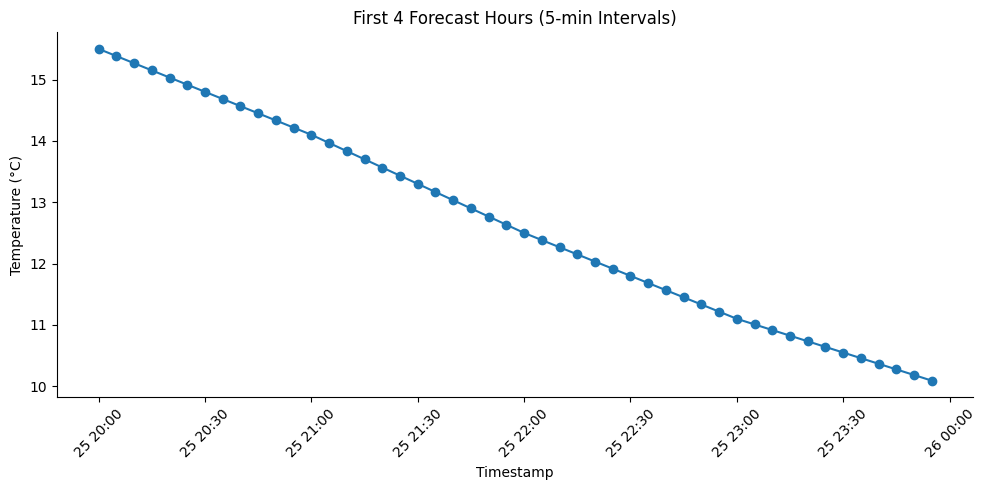

In [52]:
plt.figure(figsize=(10, 5))
plt.plot(first_4_forecast_hours.index, first_4_forecast_hours.values, marker="o")
plt.xlabel("Timestamp")
plt.ylabel("Temperature (°C)")
plt.title("First 4 Forecast Hours (5-min Intervals)")
plt.xticks(rotation=45)
plt.tight_layout()
sns.despine()
plt.show()


# Main results

- Built a client to interact with the meteo.lt api.
- Added metadata when fetching data observations or predictions.
- Explored what data is available in the api.
- Clipped together historical data and forecast data.
- Interpolated data to 5 minute intervals.

Insights:
- Average Annual Temperature: 9.27 °C
- Average Annual Air Humidity: 77.43 %
- Average Annual Day Temperature (08:00-20:00): 10.81 °C
- Average Annual Night Temperature (20:00-08:00): 7.72 °C
- Number of rainy weekends: 34

# Improvements

- Connect client to API and create live and interactive dashboard.
- Make client code cleaner, more compact without unnecessary functions and better naming.
- Save data to database.
- Analyse more stations and places rather than just Vilnius.
- Add progress bar when fetching historical data